Setup

In [1]:
%matplotlib inline

import dataLoader
import matplotlib.pyplot as plt
import torch
import CNN

# defining global variables
image_path = "./Fish_toy/images"
training_count=2
validation_count=1
batchSize=10
n_epochs=100
imgH = 28
imgW = 28
nCh = 3

Cuda support

In [2]:
# CUDA support 
if torch.cuda.is_available():
    torch.cuda.set_device(0) # 0
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    print("We are using cuda")

We are using cuda


Load images

In [3]:
import torchvision

# load images
dataset = dataLoader.FishDataset(image_path, imgH, imgW)
numberOfSpecies = len(dataset.getSpeciesList())
print("Number of species = ", numberOfSpecies)

# get Loaders
train_loader, validation_loader, test_loader = dataLoader.getLoadersFromDataset(dataset, training_count, validation_count, batchSize)

Number of images =  117
Abudefduf vaigiensis  has  4  images
Pardachirus pavoninus  has  5  images
Wetmorella albofasciata  has  5  images
Zebrasoma scopas  has  5  images
Acanthurus achilles  has  5  images
Anampses caeruleopunctatus  has  5  images
Wetmorella nigropinnata  has  5  images
Variola albimarginata  has  4  images
Upeneus moluccensis  has  5  images
Xiphocheilus typus  has  4  images
Acanthurus coeruleus  has  5  images
Acanthopagrus pacificus  has  3  images
Ablabys taenianotus  has  5  images
Acanthurus chirurgus  has  5  images
Amphiprion clarkii  has  5  images
Xenisthmus polyzonatus  has  5  images
Acanthemblemaria spinosa  has  4  images
Acanthemblemaria aspera  has  5  images
Acanthurus bahianus  has  4  images
Anampses geographicus  has  5  images
Amphiprion polymnus  has  5  images
abudefduf septemfasciatus  has  4  images
Lepidozygus tapeinosoma  has  5  images
Xanthichthys auromarginatus  has  5  images
Zanclus cornutus  has  5  images
Number of species =  25


Create model

In [4]:
model = CNN.CNN(numberOfSpecies, nCh, imgH, imgW)
loss_list, accuracy_list = CNN.trainModel(train_loader, validation_loader, n_epochs, model)

N/A% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (100 of 100) |######################| Elapsed Time: 0:09:59 Time:  0:09:59


Plot

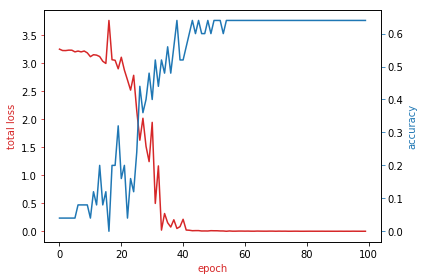

In [5]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('total loss', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

Create confusion matrix

/home/elhamod/Insync/mndhamod@gmail.com/Google Drive/Colab Notebooks/BGNN/confusion_matrix_plotter.py:60: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


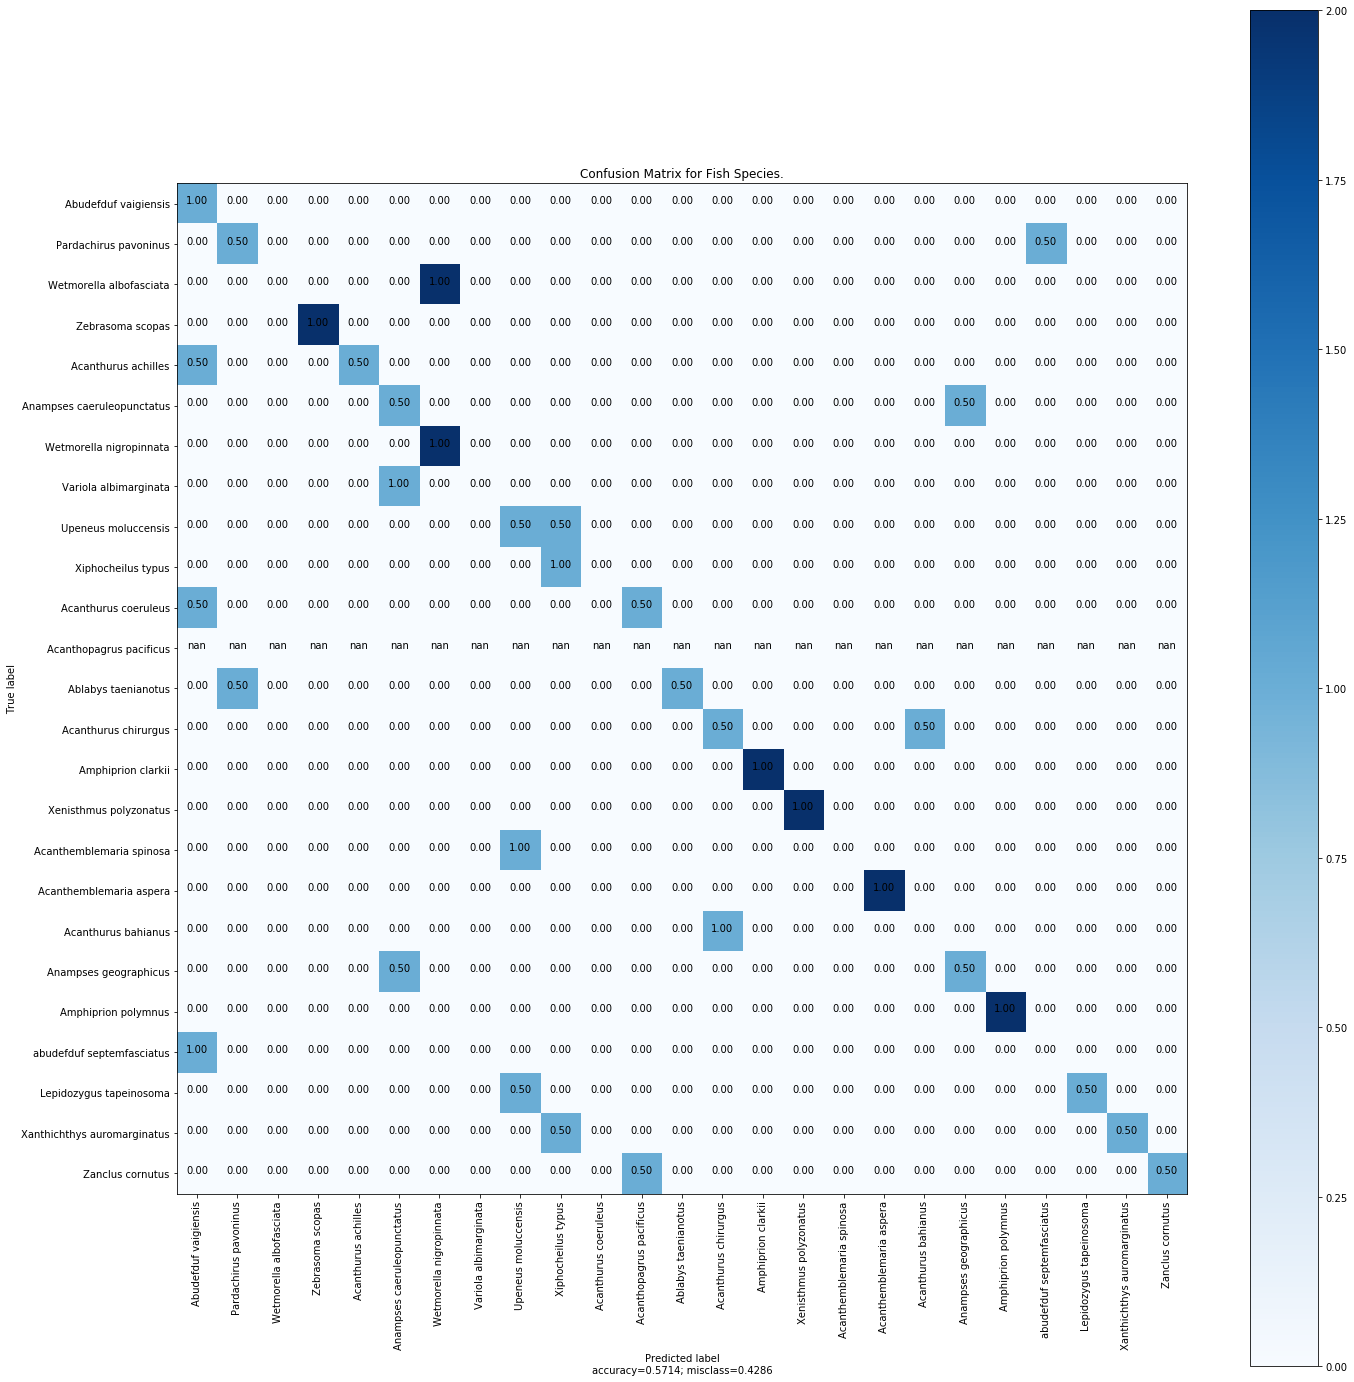

In [6]:
from sklearn.metrics import confusion_matrix
from confusion_matrix_plotter import plot_confusion_matrix2

# Initialize the prediction and label lists(tensors)
predlist=torch.zeros(0)
lbllist=torch.zeros(0)

with torch.no_grad():
    for batch in test_loader:
        inputs = batch["image"]
        classes = batch["class"]
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        # Append batch prediction results
        predlist=torch.cat([predlist,preds.float().view(-1)])
        lbllist=torch.cat([lbllist,classes.float().view(-1)])

# Confusion matrix
conf_mat=confusion_matrix(lbllist.cpu().numpy(), predlist.cpu().numpy())
    
plot_confusion_matrix2(conf_mat,
                          dataset.getSpeciesList(),
                          title='Confusion Matrix for Fish Species.')
